#Regressão Linear

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
dados = pd.read_csv('dataset.csv', sep=';')

##Exploração do banco de dados

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
dados.shape

(5000, 4)

In [ ]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [ ]:
dados.corr().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.00,0.71,-0.37,-0.02
Area,0.71,1.00,-0.28,-0.03
Dist_Praia,-0.37,-0.28,1.00,0.03
Dist_Farmacia,-0.02,-0.03,0.03,1.00


##Representações Gráficas

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

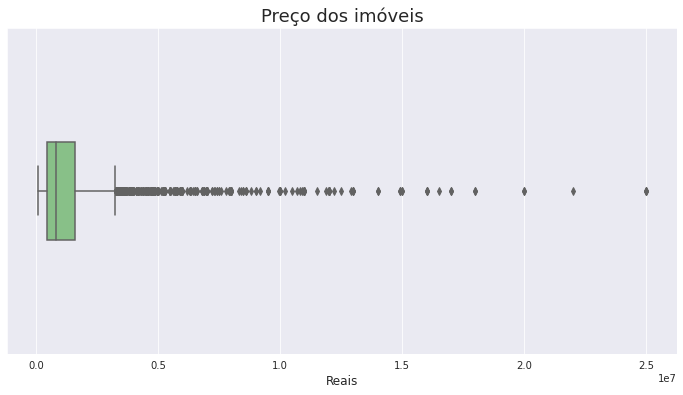

In [ ]:
ax = sns.boxplot(data = dados, x = 'Valor', orient='h', width=0.3)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis', fontsize=18)
ax.set_xlabel('Reais', fontsize=12)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


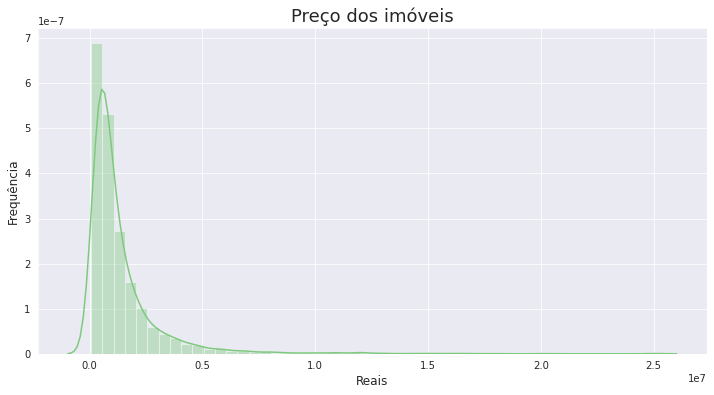

In [ ]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis', fontsize=18)
ax.set_xlabel('Reais', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax

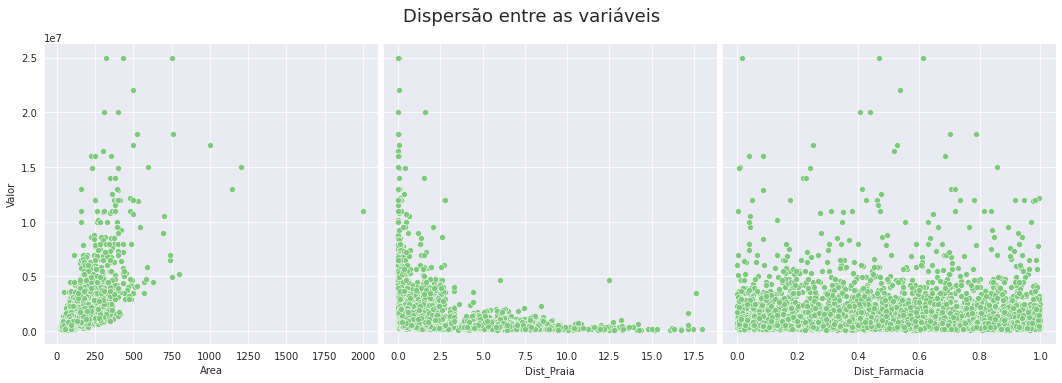

In [ ]:
ax = sns.pairplot(data=dados, y_vars='Valor', x_vars=['Area','Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.05)
ax

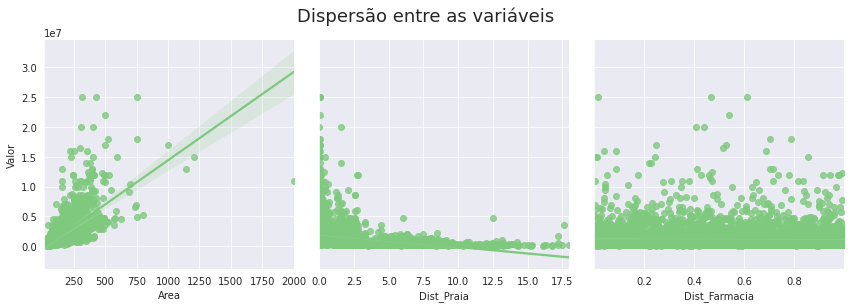

In [ ]:
ax = sns.pairplot(data=dados, y_vars='Valor', x_vars=['Area','Dist_Praia', 'Dist_Farmacia'], height=4, kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=18, y=1.05)
ax

#Transformação de variáveis

In [ ]:
np.log(np.e)

1.0

In [ ]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1) #evitar o valor zero do df soma-se 1, e só altera o patamar da variável
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


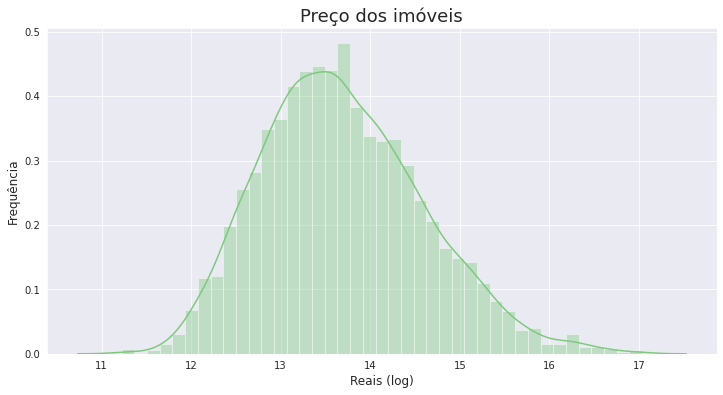

In [ ]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12,6)
ax.set_title('Preço dos imóveis', fontsize=18)
ax.set_xlabel('Reais (log)', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax

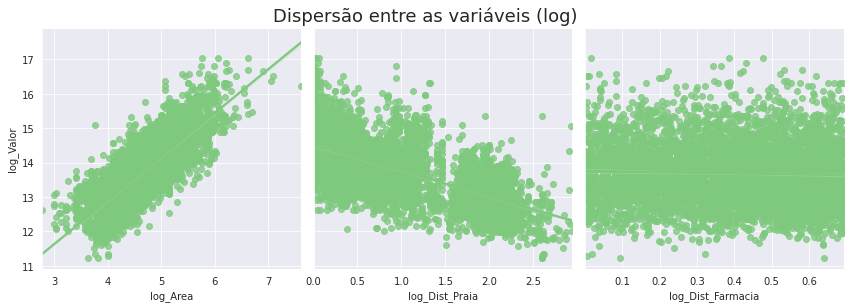

In [ ]:
ax = sns.pairplot(data=dados, y_vars='log_Valor', x_vars=['log_Area','log_Dist_Praia', 'log_Dist_Farmacia'], height=4, kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis (log)', fontsize=18, y=1.05)
ax

##Divisão de banco de dados

In [ ]:
y = dados['log_Valor']
X = dados[['log_Area','log_Dist_Praia', 'log_Dist_Farmacia']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2811)

In [ ]:
print(f'{X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]}')

(4000, 1000, 4000, 1000)


##Testes com Statsmodels

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_const = sm.add_constant(X_train)

In [ ]:
X_train_const.head()

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


In [ ]:
modelo_stats = sm.OLS(y_train, X_train_const, hasconst=True).fit()
modelo_stats

In [ ]:
modelo_stats.summary() #F-statistic tem que ser menor que 0.05 para uma confiança de 95%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:36:36   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Novo modelo

In [63]:
y = dados['log_Valor']
X = dados[['log_Area','log_Dist_Praia']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2811)

In [66]:
X_train_const = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train_const, hasconst=True).fit()
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:11:19   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

In [68]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
from sklearn import metrics
r2 = modelo.score(X_train, y_train).round(2)
print(f'R²: {r2}')

R²: 0.8


In [107]:
y_pred = modelo.predict(X_test)

In [73]:
r2_pred = metrics.r2_score(y_test, y_pred).round(2)
print(f'R²: {r2_pred}')

R²: 0.79


#Realizando previsões

In [83]:
entrada = X_test[:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [86]:
print(f'R${np.exp(modelo.predict(entrada)[0]):,.2f}')

R$1,598,889.78


In [91]:
area = int(input('Digite a área: '))
dist = int(input('Digite a distância da praia: '))+1
entrada = [[np.log(area), np.log(dist)]]
print(f'R${np.exp(modelo.predict(entrada)[0]):,.2f}')

Digite a área: 100
Digite a distância da praia: 0
R$1,479,990.89


##Coeficientes da regressão

In [92]:
modelo.intercept_

9.334916409800329

In [97]:
index = ['A', 'B', 'C']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns= ['Parâmetros (log)'])

,Parâmetros (log)
A,9.334916
B,1.058078
C,-0.490612


In [103]:
index = ['A', 'B', 'C']
pd.DataFrame(data=np.array([A, B, C]), index=index, columns= ['Parâmetros (log)'])

,Parâmetros (log)
A,11326.681428
B,2.880829
C,0.612251


##Vizualização de previsões

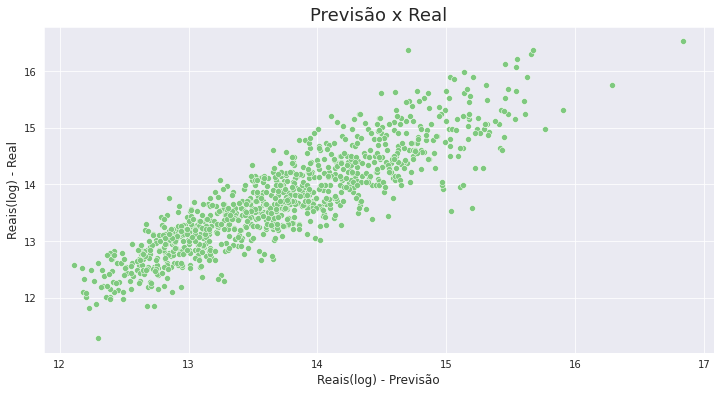

In [108]:
ax = sns.scatterplot(x = y_pred, y = y_test)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Reais(log) - Previsão', fontsize=12)
ax.set_ylabel('Reais(log) - Real', fontsize=12)
ax

In [110]:
y_pred_real = np.exp(y_pred)
y_test_real = np.exp(y_test)

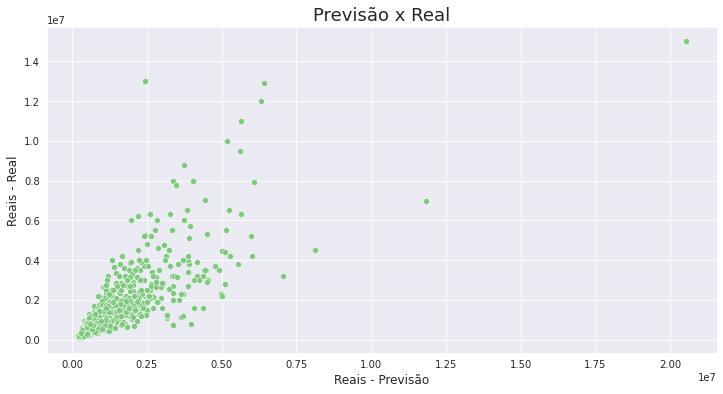

In [111]:
ax = sns.scatterplot(x = y_pred_real, y = y_test_real)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Reais - Previsão', fontsize=12)
ax.set_ylabel('Reais - Real', fontsize=12)
ax

##Resíduo

In [114]:
residuo = y_test - y_pred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


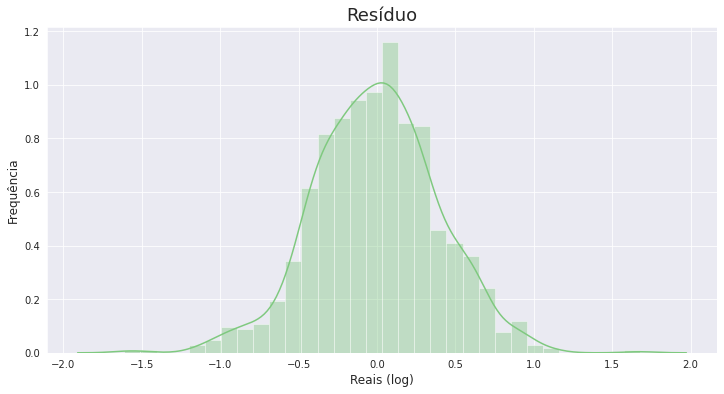

In [115]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduo', fontsize=18)
ax.set_xlabel('Reais (log)', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
ax